In [1]:
import os
from os import listdir
from random import randint
import numpy as np
import pandas as pd
import seaborn as sns
import keras
import tensorflow as tf
import random
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, Input, ZeroPadding2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential, Model, load_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
train_df = ImageDataGenerator().flow_from_directory(directory=r"C:\Users\user\OneDrive - BENNETT UNIVERSITY\Documents\uni\sem 4\AI\project\dataset_9010\dataset_9010\malimg_dataset\train", target_size=(128,128), batch_size=10000)
valid_df = ImageDataGenerator().flow_from_directory(directory=r"C:\Users\user\OneDrive - BENNETT UNIVERSITY\Documents\uni\sem 4\AI\project\dataset_9010\dataset_9010\malimg_dataset\validation", target_size=(128,128), batch_size=64)

Found 8404 images belonging to 25 classes.
Found 935 images belonging to 25 classes.


In [3]:
train_df.class_indices

{'Adialer.C': 0,
 'Agent.FYI': 1,
 'Allaple.A': 2,
 'Allaple.L': 3,
 'Alueron.gen!J': 4,
 'Autorun.K': 5,
 'C2LOP.P': 6,
 'C2LOP.gen!g': 7,
 'Dialplatform.B': 8,
 'Dontovo.A': 9,
 'Fakerean': 10,
 'Instantaccess': 11,
 'Lolyda.AA1': 12,
 'Lolyda.AA2': 13,
 'Lolyda.AA3': 14,
 'Lolyda.AT': 15,
 'Malex.gen!J': 16,
 'Obfuscator.AD': 17,
 'Rbot!gen': 18,
 'Skintrim.N': 19,
 'Swizzor.gen!E': 20,
 'Swizzor.gen!I': 21,
 'VB.AT': 22,
 'Wintrim.BX': 23,
 'Yuner.A': 24}

In [4]:
imgs, labels = next(train_df)

In [5]:
imgs.shape

(8404, 128, 128, 3)

In [6]:
labels.shape

(8404, 25)

In [7]:
label_dict = {value:key for key, value in train_df.class_indices.items()}

In [8]:
def plots(ims, figsize=(20,30), rows=10, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
    f = plt.figure(figsize=figsize)
    cols = 10 
    for i in range(0,25):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(label_dict[np.where(labels[i]!=0)[0][0]], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

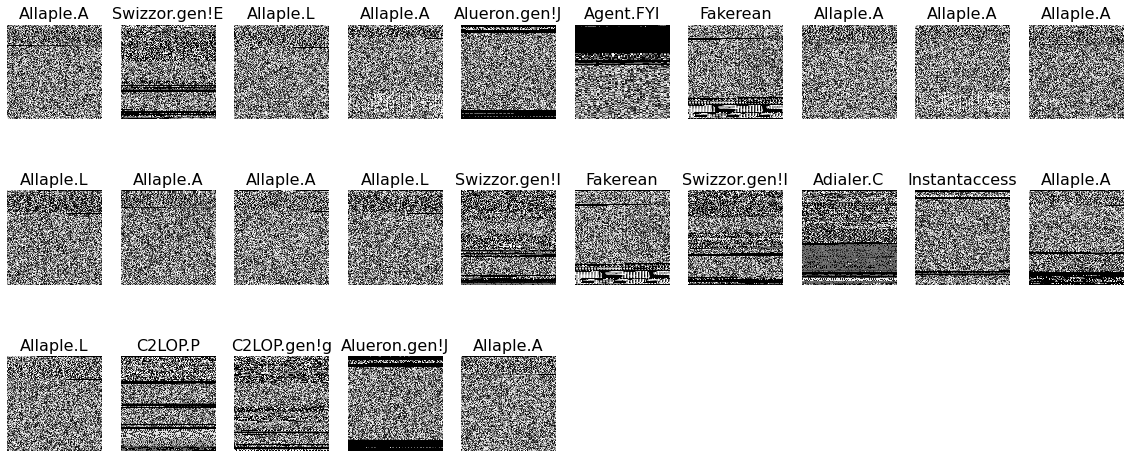

In [9]:
plots(imgs, titles = labels)

<BarContainer object of 25 artists>

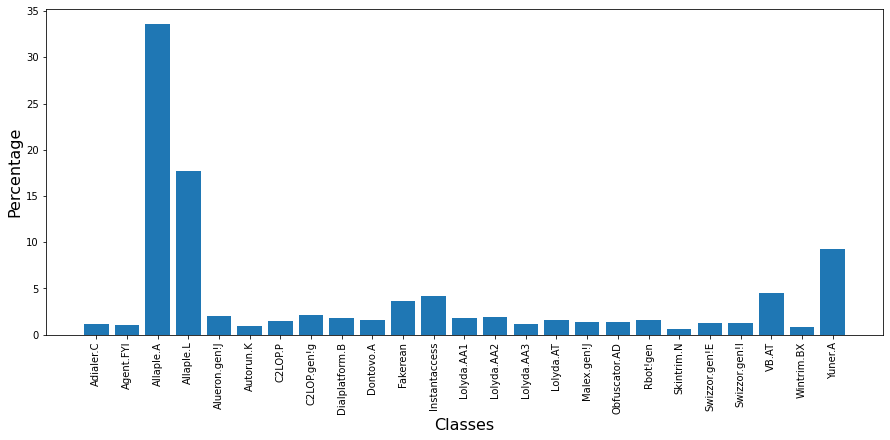

In [10]:
classes = train_df.class_indices.keys()
perc = (sum(labels)/labels.shape[0])*100
plt.rcParams["figure.figsize"] = (15,6)
plt.xlabel("Classes", fontsize=16)
plt.ylabel("Percentage", fontsize=16)
plt.xticks(rotation='vertical', fontsize=10)
plt.yticks(fontsize=10)
plt.bar(classes,perc)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(imgs/255.,labels, test_size=0.3)

In [12]:
X_train.shape

(5882, 128, 128, 3)

In [13]:
X_test.shape

(2522, 128, 128, 3)

In [14]:
y_train.shape

(5882, 25)

In [15]:
y_test.shape

(2522, 25)

In [16]:
model = Sequential()
model.add(Conv2D(30, kernel_size=(3, 3), activation='relu', input_shape=(128,128,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(15, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(50, activation='relu'))
model.add(Dense(25, activation='softmax'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 30)      840       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 30)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 15)        4065      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 15)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 30, 30, 15)        0         
                                                                 
 flatten (Flatten)           (None, 13500)             0

In [18]:
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [19]:
y_train.shape

(5882, 25)

In [20]:
y_train_new = np.argmax(y_train, axis=1)

In [21]:
y_train_new

array([22,  3,  3, ..., 24, 24, 11], dtype=int64)

In [41]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_train_new), y=y_train_new)

In [42]:
train_class_weights = dict(enumerate(class_weights))

In [23]:
eary_stop_callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

In [24]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, callbacks=eary_stop_callback)

Epoch 1/100
184/184 [==============================] - 58s 309ms/step - loss: 1.4169 - accuracy: 0.5864 - val_loss: 0.4618 - val_accuracy: 0.8584
Epoch 2/100
184/184 [==============================] - 59s 319ms/step - loss: 0.5516 - accuracy: 0.8337 - val_loss: 0.2574 - val_accuracy: 0.9175
Epoch 3/100
184/184 [==============================] - 52s 280ms/step - loss: 0.4034 - accuracy: 0.8796 - val_loss: 0.2246 - val_accuracy: 0.9461
Epoch 4/100
184/184 [==============================] - 52s 284ms/step - loss: 0.3223 - accuracy: 0.8978 - val_loss: 0.1570 - val_accuracy: 0.9504
Epoch 5/100
184/184 [==============================] - 52s 281ms/step - loss: 0.2700 - accuracy: 0.9138 - val_loss: 0.1796 - val_accuracy: 0.9500
Epoch 6/100
184/184 [==============================] - 52s 284ms/step - loss: 0.2457 - accuracy: 0.9204 - val_loss: 0.1390 - val_accuracy: 0.9596
Epoch 7/100
184/184 [==============================] - 52s 280ms/step - loss: 0.2156 - accuracy: 0.9325 - val_loss: 0.1196 -

Epoch 57/100
184/184 [==============================] - 53s 287ms/step - loss: 0.0664 - accuracy: 0.9806 - val_loss: 0.1265 - val_accuracy: 0.9691
Epoch 58/100
184/184 [==============================] - 51s 280ms/step - loss: 0.0587 - accuracy: 0.9816 - val_loss: 0.1387 - val_accuracy: 0.9699
Epoch 59/100
184/184 [==============================] - 53s 291ms/step - loss: 0.0638 - accuracy: 0.9813 - val_loss: 0.1438 - val_accuracy: 0.9683
Epoch 60/100
184/184 [==============================] - 51s 276ms/step - loss: 0.0696 - accuracy: 0.9774 - val_loss: 0.1462 - val_accuracy: 0.9671
Epoch 61/100
184/184 [==============================] - 50s 271ms/step - loss: 0.0599 - accuracy: 0.9820 - val_loss: 0.1263 - val_accuracy: 0.9695
Epoch 62/100
184/184 [==============================] - 50s 274ms/step - loss: 0.0614 - accuracy: 0.9827 - val_loss: 0.1503 - val_accuracy: 0.9683
Epoch 63/100
184/184 [==============================] - 50s 273ms/step - loss: 0.0649 - accuracy: 0.9803 - val_loss: 0

In [25]:
scores = model.evaluate(X_test, y_test)

79/79 [==============================] - 5s 57ms/step - loss: 0.1531 - accuracy: 0.9699


In [26]:
print('Final CNN accuracy: ', scores[1])

Final CNN accuracy:  0.9698652029037476


In [27]:
scores = model.evaluate(valid_df)

15/15 [==============================] - 7s 474ms/step - loss: 112.5215 - accuracy: 0.9080


In [28]:
print('Final accuracy: ', scores[1])

Final accuracy:  0.9080213904380798


In [44]:
model2 = Sequential()
model2.add(Conv2D(30, kernel_size=(3, 3), activation='relu', input_shape=(128,128,3)))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Conv2D(15, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(50, activation='relu'))
model2.add(Dense(25, activation='softmax'))

In [45]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 126, 126, 30)      840       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 63, 63, 30)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 15)        4065      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 30, 30, 15)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 30, 30, 15)        0         
                                                                 
 flatten_1 (Flatten)         (None, 13500)            

In [46]:
model2.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [48]:
model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, callbacks=eary_stop_callback, class_weight=train_class_weights)

Epoch 1/100
184/184 [==============================] - 54s 286ms/step - loss: 2.1958 - accuracy: 0.2591 - val_loss: 1.2160 - val_accuracy: 0.7462
Epoch 2/100
184/184 [==============================] - 51s 279ms/step - loss: 1.0218 - accuracy: 0.5313 - val_loss: 0.7861 - val_accuracy: 0.8216
Epoch 3/100
184/184 [==============================] - 53s 286ms/step - loss: 0.7325 - accuracy: 0.6384 - val_loss: 0.5050 - val_accuracy: 0.9136
Epoch 4/100
184/184 [==============================] - 52s 281ms/step - loss: 0.5892 - accuracy: 0.6914 - val_loss: 0.4860 - val_accuracy: 0.8347
Epoch 5/100
184/184 [==============================] - 51s 280ms/step - loss: 0.5219 - accuracy: 0.7557 - val_loss: 0.7631 - val_accuracy: 0.8454
Epoch 6/100
184/184 [==============================] - 53s 287ms/step - loss: 0.4594 - accuracy: 0.7841 - val_loss: 0.2953 - val_accuracy: 0.9306
Epoch 7/100
184/184 [==============================] - 51s 280ms/step - loss: 0.3737 - accuracy: 0.8273 - val_loss: 0.2236 -

Epoch 57/100
184/184 [==============================] - 51s 276ms/step - loss: 0.0989 - accuracy: 0.9373 - val_loss: 0.2271 - val_accuracy: 0.8767
Epoch 58/100
184/184 [==============================] - 50s 274ms/step - loss: 0.1238 - accuracy: 0.9364 - val_loss: 0.2477 - val_accuracy: 0.8739
Epoch 59/100
184/184 [==============================] - 53s 291ms/step - loss: 0.1057 - accuracy: 0.9328 - val_loss: 0.2261 - val_accuracy: 0.8763
Epoch 60/100
184/184 [==============================] - 52s 281ms/step - loss: 0.1154 - accuracy: 0.9385 - val_loss: 0.2728 - val_accuracy: 0.8755
Epoch 61/100
184/184 [==============================] - 52s 284ms/step - loss: 0.1227 - accuracy: 0.9255 - val_loss: 0.2512 - val_accuracy: 0.8711
Epoch 62/100
184/184 [==============================] - 51s 275ms/step - loss: 0.1059 - accuracy: 0.9327 - val_loss: 0.2199 - val_accuracy: 0.8795
Epoch 63/100
184/184 [==============================] - 52s 281ms/step - loss: 0.0837 - accuracy: 0.9354 - val_loss: 0

In [49]:
scores = model2.evaluate(X_test, y_test)

79/79 [==============================] - 4s 54ms/step - loss: 0.2563 - accuracy: 0.8775


In [50]:
print('Final CNN accuracy: ', scores[1])

Final CNN accuracy:  0.8774781823158264


In [51]:
scores = model.evaluate(valid_df)

15/15 [==============================] - 3s 213ms/step - loss: 112.5215 - accuracy: 0.9080


In [52]:
print('Final accuracy: ', scores[1])

Final accuracy:  0.9080213904380798


In [29]:
y_pred = model.predict(X_test, verbose=0)
y_pred

array([[7.4998282e-17, 2.9103201e-13, 1.0000000e+00, ..., 1.3775424e-15,
        4.8259538e-16, 5.6230016e-19],
       [1.4223000e-16, 2.6686639e-13, 1.0000000e+00, ..., 3.6244705e-15,
        1.2750200e-15, 5.4732515e-19],
       [3.6634030e-24, 8.9158523e-17, 1.6236317e-14, ..., 1.6825337e-17,
        7.6963313e-17, 4.1395619e-29],
       ...,
       [6.8115544e-24, 2.0805952e-16, 9.2750972e-15, ..., 5.2906350e-17,
        1.8569264e-16, 2.7378281e-28],
       [8.4518744e-22, 2.3830119e-17, 1.0000000e+00, ..., 1.1319883e-19,
        4.8512842e-21, 1.5378133e-25],
       [2.5713008e-12, 2.3127311e-10, 1.0000000e+00, ..., 5.6764597e-12,
        1.3151324e-11, 2.3839418e-15]], dtype=float32)

In [53]:
y_pred2 = model2.predict(X_test, verbose=0)
y_pred2

array([[6.6026651e-10, 1.3440886e-07, 9.9999297e-01, ..., 7.5951493e-12,
        2.0611608e-07, 1.7847421e-11],
       [7.9049132e-09, 1.5774291e-06, 9.9975139e-01, ..., 2.3741220e-10,
        1.2080976e-06, 2.6650102e-09],
       [3.8673626e-12, 2.9348888e-11, 2.7273444e-07, ..., 2.5147771e-14,
        1.4057967e-12, 1.0582702e-13],
       ...,
       [1.3841343e-11, 8.8796429e-11, 3.2959790e-07, ..., 2.4703137e-13,
        8.6348359e-12, 6.3590013e-13],
       [5.9615102e-10, 3.3451983e-08, 9.9999332e-01, ..., 5.2703189e-12,
        3.5140992e-08, 1.9288939e-12],
       [1.2673793e-05, 1.1125987e-05, 8.4514248e-01, ..., 1.2640912e-07,
        1.5113646e-01, 7.1841720e-07]], dtype=float32)

In [54]:
y_pred_new = np.argmax(y_pred, axis=1)

In [55]:
y_pred2_new = np.argmax(y_pred2, axis=1)

In [31]:
y_test2 = np.argmax(y_test, axis=1)
y_test2

array([2, 2, 3, ..., 3, 2, 2], dtype=int64)

In [32]:
from sklearn import metrics
c_matrix = metrics.confusion_matrix(y_test2, y_pred2)

In [33]:
import seaborn as sns
def confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

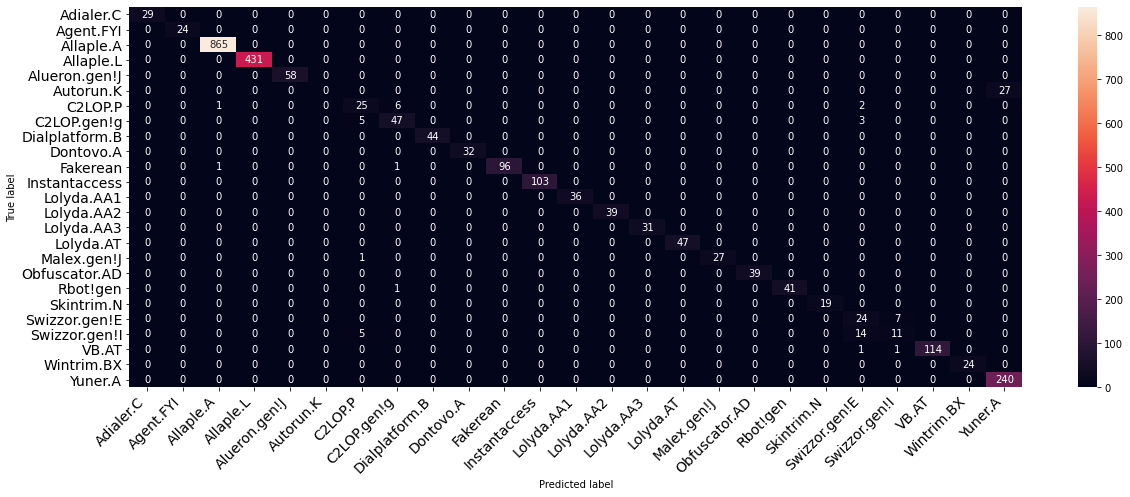

In [34]:
class_names= train_df.class_indices
confusion_matrix(c_matrix, class_names, figsize = (20,7), fontsize=14)

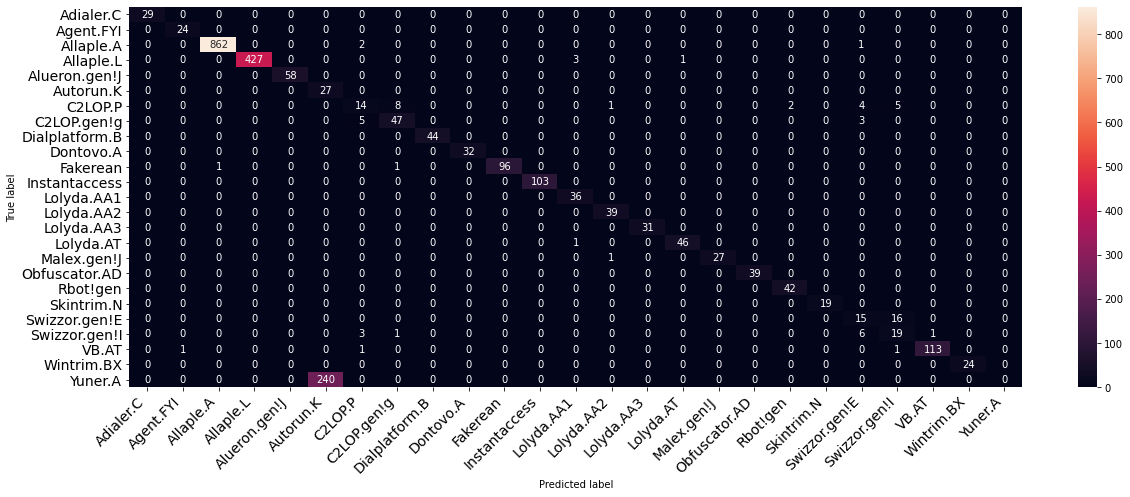

In [56]:
c_matrix = metrics.confusion_matrix(y_test2, y_pred2_new)
confusion_matrix(c_matrix, class_names, figsize = (20,7), fontsize=14)

In [80]:
def predict_plots(ims, figsize=(20,30), rows=10, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
    f = plt.figure(figsize=figsize)
    cols = 5 
    for i in range(0,25):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        k = random.randint(0, 8404)
        label_key = np.argmax(model.predict(np.expand_dims(imgs[k],axis=0)))
        if titles is not None:
            sp.set_title(label_dict[label_key]+" / "+label_dict[np.where(labels[k]!=0)[0][0]], color=("green" if label_dict[label_key] == label_dict[np.where(labels[k]!=0)[0][0]] else "red"))
        plt.imshow(ims[k], interpolation=None if interp else 'none')

1/1 [==============================] - 0s 19ms/step


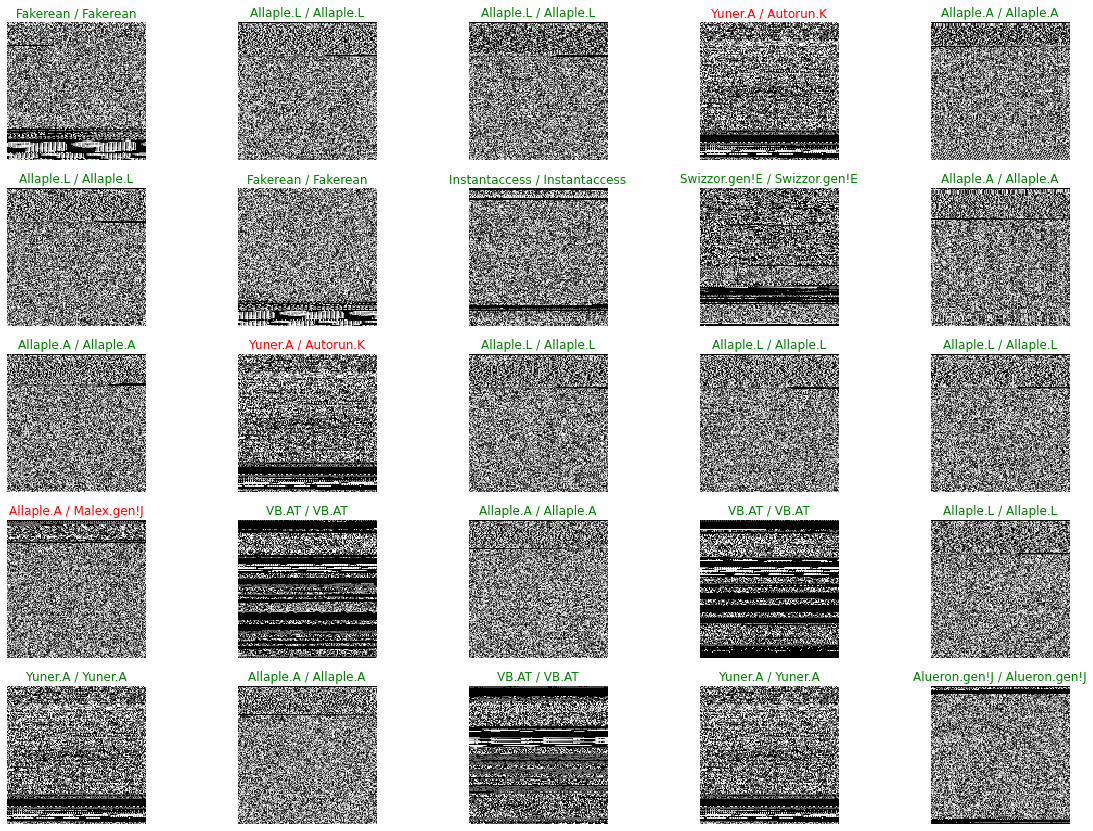

In [81]:
predict_plots(imgs, titles = labels)

In [82]:
def predict_plots2(ims, figsize=(20,30), rows=10, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
    f = plt.figure(figsize=figsize)
    cols = 5 
    for i in range(0,25):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        k = random.randint(0, 8404)
        label_key = np.argmax(model2.predict(np.expand_dims(imgs[k],axis=0)))
        if titles is not None:
            sp.set_title(label_dict[label_key]+" / "+label_dict[np.where(labels[k]!=0)[0][0]], color=("green" if label_dict[label_key] == label_dict[np.where(labels[k]!=0)[0][0]] else "red"))
        plt.imshow(ims[k], interpolation=None if interp else 'none')

1/1 [==============================] - 0s 17ms/step


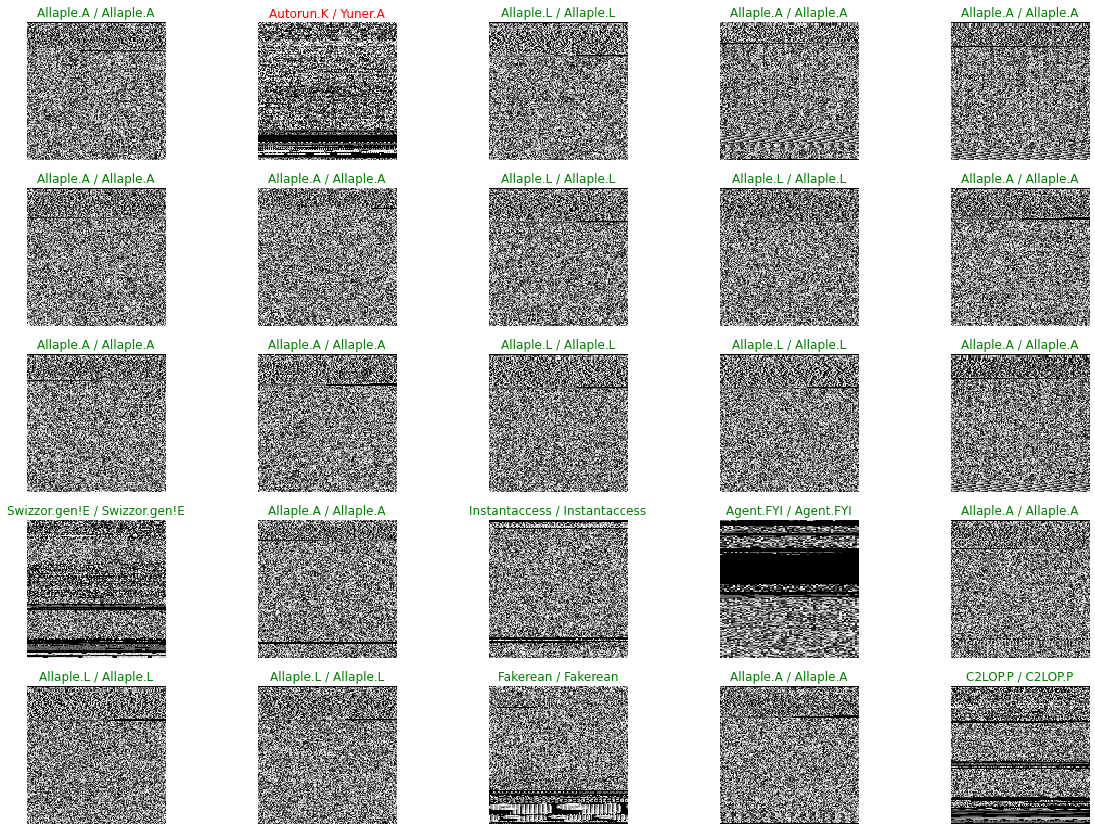

In [83]:
predict_plots2(imgs, titles = labels)

In [76]:
model.save('malware_classification.h5')

In [77]:
model2.save('malware_classification2.h5')

In [84]:
model3 = Sequential()
model3.add(Conv2D(30, kernel_size=(3, 3), activation='relu', input_shape=(128,128,3)))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Conv2D(15, (3, 3), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))
model3.add(Flatten())
model3.add(Dense(128, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(50, activation='relu'))
model3.add(Dense(25, activation='softmax'))

In [85]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 126, 126, 30)      840       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 63, 63, 30)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 61, 61, 15)        4065      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 15)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 30, 30, 15)        0         
                                                                 
 flatten_2 (Flatten)         (None, 13500)            

In [86]:
model3.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [87]:
history = model3.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, callbacks=eary_stop_callback)

Epoch 1/100
184/184 [==============================] - 54s 287ms/step - loss: 1.3420 - accuracy: 0.6153 - val_loss: 0.4424 - val_accuracy: 0.8755
Epoch 2/100
184/184 [==============================] - 51s 275ms/step - loss: 0.5138 - accuracy: 0.8519 - val_loss: 0.2057 - val_accuracy: 0.9437
Epoch 3/100
184/184 [==============================] - 52s 282ms/step - loss: 0.3273 - accuracy: 0.9043 - val_loss: 0.1552 - val_accuracy: 0.9500
Epoch 4/100
184/184 [==============================] - 51s 278ms/step - loss: 0.2566 - accuracy: 0.9208 - val_loss: 0.1375 - val_accuracy: 0.9528
Epoch 5/100
184/184 [==============================] - 53s 288ms/step - loss: 0.2241 - accuracy: 0.9323 - val_loss: 0.1147 - val_accuracy: 0.9588
Epoch 6/100
184/184 [==============================] - 54s 292ms/step - loss: 0.1890 - accuracy: 0.9364 - val_loss: 0.1189 - val_accuracy: 0.9607
Epoch 7/100
184/184 [==============================] - 57s 309ms/step - loss: 0.1919 - accuracy: 0.9373 - val_loss: 0.1180 -

Epoch 57/100
184/184 [==============================] - 52s 280ms/step - loss: 0.0574 - accuracy: 0.9828 - val_loss: 0.1528 - val_accuracy: 0.9647
Epoch 58/100
184/184 [==============================] - 53s 290ms/step - loss: 0.0512 - accuracy: 0.9854 - val_loss: 0.1394 - val_accuracy: 0.9651
Epoch 59/100
184/184 [==============================] - 51s 276ms/step - loss: 0.0561 - accuracy: 0.9830 - val_loss: 0.1406 - val_accuracy: 0.9619
Epoch 60/100
184/184 [==============================] - 52s 284ms/step - loss: 0.0540 - accuracy: 0.9832 - val_loss: 0.1567 - val_accuracy: 0.9647
Epoch 61/100
184/184 [==============================] - 51s 280ms/step - loss: 0.0509 - accuracy: 0.9854 - val_loss: 0.1461 - val_accuracy: 0.9667
Epoch 62/100
184/184 [==============================] - 50s 274ms/step - loss: 0.0587 - accuracy: 0.9827 - val_loss: 0.1391 - val_accuracy: 0.9643
Epoch 63/100
184/184 [==============================] - 52s 282ms/step - loss: 0.0562 - accuracy: 0.9830 - val_loss: 0

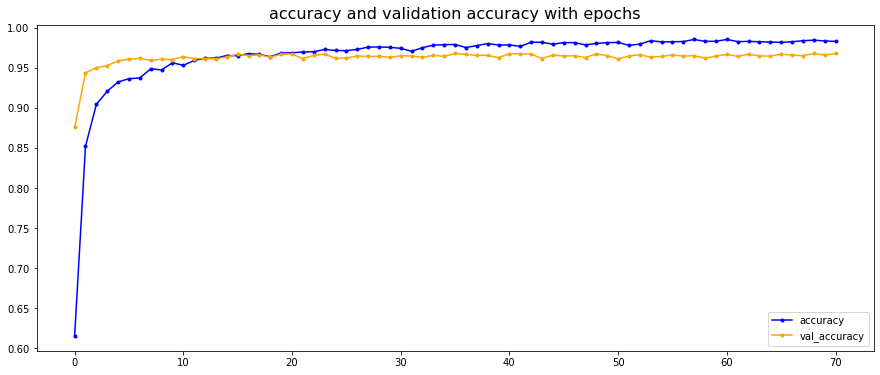

In [88]:
plt.title('accuracy and validation accuracy with epochs',fontsize=16)

plt.plot(history.history['accuracy'],marker='.',color="blue",label="accuracy")

plt.plot(history.history['val_accuracy'],marker='.',color="orange",label="val_accuracy")

plt.legend()
plt.show()

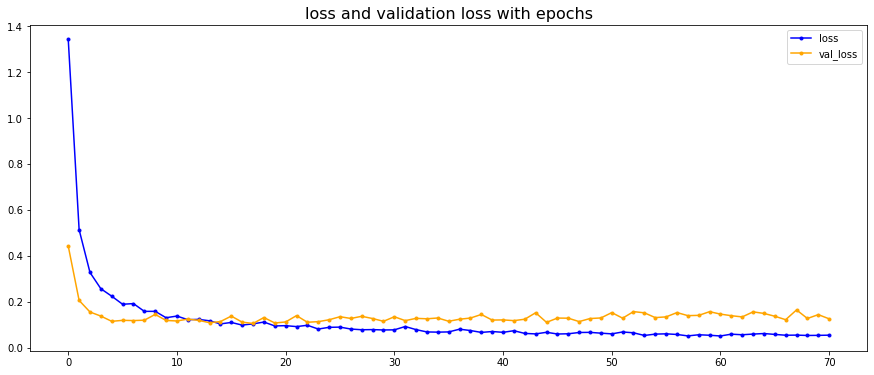

In [89]:
plt.title('loss and validation loss with epochs',fontsize=16)

plt.plot(history.history['loss'],marker='.',color="blue",label="loss")

plt.plot(history.history['val_loss'],marker='.',color="orange",label="val_loss")

plt.legend()
plt.show()